In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')

from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as scs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer

In [43]:
df = pd.read_csv('data_correlation_gone.csv',index_col = 0)

In [44]:
check_col = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot','distance_from_a_city']

In [45]:
df['price'].mean()

541639.8338275844

In [46]:
df.loc[df['price']<100000.0]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,zipcode,Age_of_House,Years_last_renovation,basement,biggerliving,biggerlot,distance_from_a_city,distance_from_airport
1904,2014-05-08,82500.0,2,1.00,520,22334,1.0,0.0,0.0,2,5,98168,69,69,0,0,1,14.536568,4.062153
2743,2015-02-19,89950.0,1,1.00,570,4080,1.0,0.0,0.0,3,5,98146,78,78,0,0,0,10.914282,7.752844
2932,2014-12-12,95000.0,2,1.00,800,8550,1.0,0.0,0.0,3,7,98198,73,73,0,0,0,22.495286,4.046791
3320,2015-04-30,84000.0,2,1.00,700,20130,1.0,0.0,0.0,3,6,98168,71,71,0,0,1,15.523977,4.204679
3355,2015-05-05,95000.0,1,0.75,760,5746,1.0,0.0,0.0,4,5,98002,105,105,0,0,0,33.996655,16.761137
5186,2014-10-14,89000.0,3,1.00,900,4750,1.0,0.0,0.0,4,6,98023,51,51,0,0,1,34.003427,16.328762
7060,2015-03-03,90000.0,1,1.00,780,4000,1.0,0.0,0.0,3,5,98108,115,115,0,0,0,7.368198,11.080737
7313,2014-11-05,82000.0,3,1.00,860,10426,1.0,0.0,0.0,3,6,98146,66,66,0,0,0,12.155294,6.804226
9076,2014-09-15,85000.0,2,1.00,830,9000,1.0,0.0,0.0,3,6,98032,81,81,0,0,1,25.653890,8.203937
9378,2014-09-19,95000.0,2,1.00,1070,20450,1.0,0.0,0.0,2,6,98058,72,72,0,0,1,19.667034,8.984245


In [47]:
df = df.loc[(df['price']<800000.0) | (df['price']<100000.0)]

In [4]:
def remove_outliers(df, col, threshold = 3):
    zscores = scs.zscore(df[col])
    indices = np.abs(np.where(zscores > threshold))
    return indices[0]
check_col = ['price',

all_indices = []
for col in check_col:
    indices = remove_outliers(df, col, threshold = 3)
    all_indices.extend(indices)
all_indices = np.unique(all_indices)

In [5]:
df.reset_index(drop=True,inplace=True)

In [6]:
df.drop(all_indices,axis=0,inplace= True)

In [80]:
df = df.loc[df['condition']>=3]

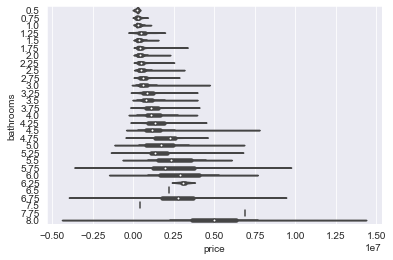

In [104]:
sns.violinplot(x='price', y='bathrooms', data=df, orient='h')
plt.show()

In [5]:
df = df.round({'bathrooms':0})

In [81]:
df['cond3'] = df.condition.apply(lambda x: 1 if x ==3 else 0)
df['cond4'] = df.condition.apply(lambda x: 1 if x ==4 else 0)
df['cond5'] = df.condition.apply(lambda x: 1 if x ==5 else 0)

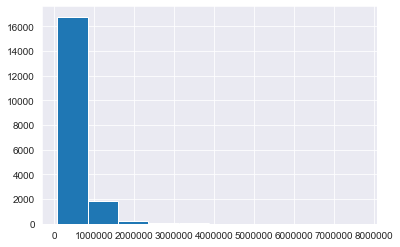

In [107]:
df['price'].hist()

In [38]:
features =  ['sqft_living','Age_of_House', 'Years_last_renovation','distance_from_a_city','sqft_lot']

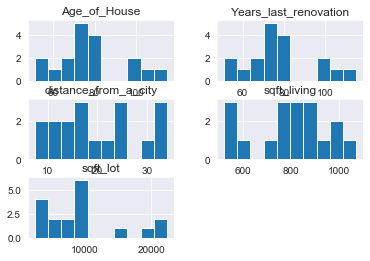

In [39]:
df[features].hist();

In [48]:
df.shape

(16549, 19)

In [49]:
tobox =['sqft_living','Age_of_House', 'Years_last_renovation','distance_from_a_city','sqft_lot']

In [112]:
tobox = ['distance_from_a_city','sqft_lot','sqft_living',]

In [50]:
for feat in tobox:
    df[feat],b = scs.boxcox(df[feat])


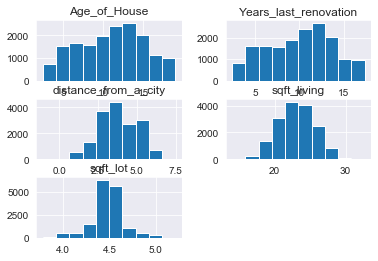

In [11]:
df[features].hist();

In [51]:
def norm_feat(series):
    return (series - series.mean())/series.std()

In [52]:
df['bedbath'] = df['bedrooms']*df['bathrooms']

In [53]:
df['livinglot'] = df['sqft_living']*df['sqft_lot']

In [54]:
norm = ['bedrooms','bathrooms','sqft_living','sqft_lot','distance_from_a_city','Age_of_House',
           'Years_last_renovation','bedbath','livinglot']


In [55]:
for feat in norm:
    df[feat] = norm_feat(df[feat])


In [56]:
# tomodel = ['distance_from_a_city','Years_last_renovation','sqft_living']

In [57]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'zipcode',
       'Age_of_House', 'Years_last_renovation', 'basement', 'biggerliving',
       'biggerlot', 'distance_from_a_city', 'distance_from_airport', 'bedbath',
       'livinglot'],
      dtype='object')

In [122]:
# x_cols = ['bedrooms','bathrooms','sqft_living','sqft_lot','distance_from_a_city',
#            'Age_of_House','basement','bedbath','grade']
# outcome = ['price']

In [58]:
x_cols = ['bedrooms','bathrooms','sqft_living','sqft_lot','distance_from_a_city',
           'basement','grade']
outcome = ['price']

In [111]:
x_cols = ['bedrooms','bathrooms','sqft_living','sqft_lot','distance_from_a_city','Years_last_renovation',
           'basement','grade']
outcome = ['price']

In [112]:
X = df[x_cols]
y = df['price']

In [113]:
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.958
Model:                            OLS   Adj. R-squared (uncentered):              0.958
Method:                 Least Squares   F-statistic:                          4.625e+04
Date:                Thu, 04 Jun 2020   Prob (F-statistic):                        0.00
Time:                        14:20:34   Log-Likelihood:                     -2.1103e+05
No. Observations:               16378   AIC:                                  4.221e+05
Df Residuals:                   16370   BIC:                                  4.221e+05
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
bedrooms              -1.311e+04    957.364    -13.690      0.000    -1.5e+04   -1.12e+04
bathrooms              8178.1479   1259.593      6.493      0.000    5709.208    1.06e+04
sqft_living            6.515e+04   1302.860     50.005      0.000    6.26e+04    6.77e+04
sqft_lot               2.308e+04    984.803     23.438      0.000    2.12e+04     2.5e+04
distance_from_a_city  -9.293e+04    909.223   -102.205      0.000   -9.47e+04   -9.11e+04
Years_last_renovation  1.151e+04   1075.559     10.703      0.000    9403.016    1.36e+04
basement              -1.648e+04   1678.098     -9.820      0.000   -1.98e+04   -1.32e+04
grade                  5.946e+04    128.665    462.150      0.000    5.92e+04    5.97e+04
==============================================================================
Omnibus:                      313.210   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              403.159
Skew:                           0.257   Prob(JB):                     2.85e-88
Kurtosis:                       3.571   Cond. No.                         17.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [114]:
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

8 8
['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'distance_from_a_city']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
bedrooms,-1.311e+04,957.364,-13.690,0.0,-1.5e+04,-1.12e+04
bathrooms,8178.1479,1259.593,6.493,0.0,5709.208,1.06e+04
sqft_living,6.515e+04,1302.860,50.005,0.0,6.26e+04,6.77e+04
sqft_lot,2.308e+04,984.803,23.438,0.0,2.12e+04,2.5e+04
distance_from_a_city,-9.293e+04,909.223,-102.205,0.0,-9.47e+04,-9.11e+04


In [115]:
X = df[x_cols]
y= df['price']

In [116]:
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.958
Model:                            OLS   Adj. R-squared (uncentered):              0.958
Method:                 Least Squares   F-statistic:                          4.625e+04
Date:                Thu, 04 Jun 2020   Prob (F-statistic):                        0.00
Time:                        14:20:37   Log-Likelihood:                     -2.1103e+05
No. Observations:               16378   AIC:                                  4.221e+05
Df Residuals:                   16370   BIC:                                  4.221e+05
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
bedrooms              -1.311e+04    957.364    -13.690      0.000    -1.5e+04   -1.12e+04
bathrooms              8178.1479   1259.593      6.493      0.000    5709.208    1.06e+04
sqft_living            6.515e+04   1302.860     50.005      0.000    6.26e+04    6.77e+04
sqft_lot               2.308e+04    984.803     23.438      0.000    2.12e+04     2.5e+04
distance_from_a_city  -9.293e+04    909.223   -102.205      0.000   -9.47e+04   -9.11e+04
Years_last_renovation  1.151e+04   1075.559     10.703      0.000    9403.016    1.36e+04
basement              -1.648e+04   1678.098     -9.820      0.000   -1.98e+04   -1.32e+04
grade                  5.946e+04    128.665    462.150      0.000    5.92e+04    5.97e+04
==============================================================================
Omnibus:                      313.210   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              403.159
Skew:                           0.257   Prob(JB):                     2.85e-88
Kurtosis:                       3.571   Cond. No.                         17.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [117]:
# Your code here - Code a way to identify multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df[x_cols]
vif = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
list(zip(x_cols,vif))

[('bedrooms', 1.6403218001421798),
 ('bathrooms', 2.84206903231568),
 ('sqft_living', 3.032329865897945),
 ('sqft_lot', 1.7378351278285535),
 ('distance_from_a_city', 1.4848303411859038),
 ('Years_last_renovation', 2.076655984330706),
 ('basement', 1.8376520588350942),
 ('grade', 1.6577103366289547)]

In [118]:
vif_scores = list(zip(x_cols, vif))
x_cols = [x for x,vif in vif_scores if vif < 5.5]
print(len(vif_scores), len(x_cols))

8 8


In [119]:
X = df[x_cols]
y= df['price']
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.958
Model:                            OLS   Adj. R-squared (uncentered):              0.958
Method:                 Least Squares   F-statistic:                          4.625e+04
Date:                Thu, 04 Jun 2020   Prob (F-statistic):                        0.00
Time:                        14:20:39   Log-Likelihood:                     -2.1103e+05
No. Observations:               16378   AIC:                                  4.221e+05
Df Residuals:                   16370   BIC:                                  4.221e+05
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
bedrooms              -1.311e+04    957.364    -13.690      0.000    -1.5e+04   -1.12e+04
bathrooms              8178.1479   1259.593      6.493      0.000    5709.208    1.06e+04
sqft_living            6.515e+04   1302.860     50.005      0.000    6.26e+04    6.77e+04
sqft_lot               2.308e+04    984.803     23.438      0.000    2.12e+04     2.5e+04
distance_from_a_city  -9.293e+04    909.223   -102.205      0.000   -9.47e+04   -9.11e+04
Years_last_renovation  1.151e+04   1075.559     10.703      0.000    9403.016    1.36e+04
basement              -1.648e+04   1678.098     -9.820      0.000   -1.98e+04   -1.32e+04
grade                  5.946e+04    128.665    462.150      0.000    5.92e+04    5.97e+04
==============================================================================
Omnibus:                      313.210   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              403.159
Skew:                           0.257   Prob(JB):                     2.85e-88
Kurtosis:                       3.571   Cond. No.                         17.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [120]:
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.958
Model:                            OLS   Adj. R-squared (uncentered):              0.958
Method:                 Least Squares   F-statistic:                          4.625e+04
Date:                Thu, 04 Jun 2020   Prob (F-statistic):                        0.00
Time:                        14:20:40   Log-Likelihood:                     -2.1103e+05
No. Observations:               16378   AIC:                                  4.221e+05
Df Residuals:                   16370   BIC:                                  4.221e+05
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
bedrooms              -1.311e+04    957.364    -13.690      0.000    -1.5e+04   -1.12e+04
bathrooms              8178.1479   1259.593      6.493      0.000    5709.208    1.06e+04
sqft_living            6.515e+04   1302.860     50.005      0.000    6.26e+04    6.77e+04
sqft_lot               2.308e+04    984.803     23.438      0.000    2.12e+04     2.5e+04
distance_from_a_city  -9.293e+04    909.223   -102.205      0.000   -9.47e+04   -9.11e+04
Years_last_renovation  1.151e+04   1075.559     10.703      0.000    9403.016    1.36e+04
basement              -1.648e+04   1678.098     -9.820      0.000   -1.98e+04   -1.32e+04
grade                  5.946e+04    128.665    462.150      0.000    5.92e+04    5.97e+04
==============================================================================
Omnibus:                      313.210   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              403.159
Skew:                           0.257   Prob(JB):                     2.85e-88
Kurtosis:                       3.571   Cond. No.                         17.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

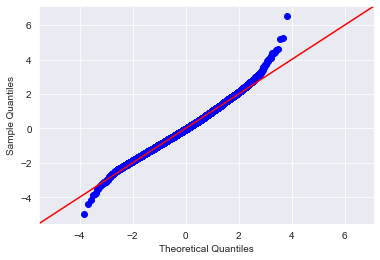

In [121]:
fig = sm.graphics.qqplot(model.resid, dist=scs.norm, line='45', fit=True)


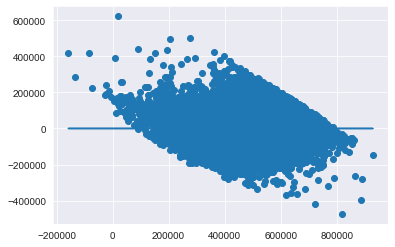

In [122]:
plt.scatter(model.predict(X), model.resid)
plt.plot(model.predict(X), [0 for i in range(len(df))])

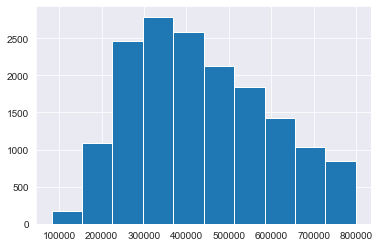

In [123]:
df.price.hist()

In [124]:
for i in range(80,100):
    q = i/100
    print("{} percentile: {}".format(q, df.price.quantile(q=q)))

0.8 percentile: 585000.0
0.81 percentile: 592500.0
0.82 percentile: 600000.0
0.83 percentile: 606377.5
0.84 percentile: 615340.0000000002
0.85 percentile: 625000.0
0.86 percentile: 635000.0
0.87 percentile: 643999.4999999999
0.88 percentile: 650000.0
0.89 percentile: 660500.0
0.9 percentile: 675000.0
0.91 percentile: 685000.0
0.92 percentile: 695000.0
0.93 percentile: 705000.0
0.94 percentile: 718189.9999999995
0.95 percentile: 730000.0
0.96 percentile: 744000.0
0.97 percentile: 754000.0
0.98 percentile: 770000.0
0.99 percentile: 782000.0


In [125]:
orig_tot = len(df)
df = df[df.price < 760000.0] # Subsetting to remove extreme outliers
print('Percent removed:', (orig_tot -len(df))/orig_tot)


Percent removed: 0.027536939797289047


In [126]:
X = df[x_cols]
y = df['price']

In [127]:
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.958
Model:                            OLS   Adj. R-squared (uncentered):              0.958
Method:                 Least Squares   F-statistic:                          4.552e+04
Date:                Thu, 04 Jun 2020   Prob (F-statistic):                        0.00
Time:                        14:20:54   Log-Likelihood:                     -2.0470e+05
No. Observations:               15927   AIC:                                  4.094e+05
Df Residuals:                   15919   BIC:                                  4.095e+05
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
bedrooms              -1.243e+04    941.225    -13.205      0.000   -1.43e+04   -1.06e+04
bathrooms              8528.5249   1242.428      6.864      0.000    6093.225     1.1e+04
sqft_living            6.008e+04   1291.313     46.529      0.000    5.76e+04    6.26e+04
sqft_lot               2.291e+04    972.894     23.553      0.000     2.1e+04    2.48e+04
distance_from_a_city  -8.988e+04    900.415    -99.824      0.000   -9.16e+04   -8.81e+04
Years_last_renovation  1.077e+04   1061.430     10.143      0.000    8685.812    1.28e+04
basement              -1.455e+04   1651.310     -8.810      0.000   -1.78e+04   -1.13e+04
grade                  5.879e+04    127.285    461.899      0.000    5.85e+04     5.9e+04
==============================================================================
Omnibus:                      227.483   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              280.240
Skew:                           0.222   Prob(JB):                     1.40e-61
Kurtosis:                       3.475   Cond. No.                         17.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [128]:
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

8 8
['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'distance_from_a_city']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
bedrooms,-1.243e+04,941.225,-13.205,0.0,-1.43e+04,-1.06e+04
bathrooms,8528.5249,1242.428,6.864,0.0,6093.225,1.1e+04
sqft_living,6.008e+04,1291.313,46.529,0.0,5.76e+04,6.26e+04
sqft_lot,2.291e+04,972.894,23.553,0.0,2.1e+04,2.48e+04
distance_from_a_city,-8.988e+04,900.415,-99.824,0.0,-9.16e+04,-8.81e+04


In [129]:
X = df[x_cols]
y= df['price']
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.958
Model:                            OLS   Adj. R-squared (uncentered):              0.958
Method:                 Least Squares   F-statistic:                          4.552e+04
Date:                Thu, 04 Jun 2020   Prob (F-statistic):                        0.00
Time:                        14:21:07   Log-Likelihood:                     -2.0470e+05
No. Observations:               15927   AIC:                                  4.094e+05
Df Residuals:                   15919   BIC:                                  4.095e+05
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
bedrooms              -1.243e+04    941.225    -13.205      0.000   -1.43e+04   -1.06e+04
bathrooms              8528.5249   1242.428      6.864      0.000    6093.225     1.1e+04
sqft_living            6.008e+04   1291.313     46.529      0.000    5.76e+04    6.26e+04
sqft_lot               2.291e+04    972.894     23.553      0.000     2.1e+04    2.48e+04
distance_from_a_city  -8.988e+04    900.415    -99.824      0.000   -9.16e+04   -8.81e+04
Years_last_renovation  1.077e+04   1061.430     10.143      0.000    8685.812    1.28e+04
basement              -1.455e+04   1651.310     -8.810      0.000   -1.78e+04   -1.13e+04
grade                  5.879e+04    127.285    461.899      0.000    5.85e+04     5.9e+04
==============================================================================
Omnibus:                      227.483   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              280.240
Skew:                           0.222   Prob(JB):                     1.40e-61
Kurtosis:                       3.475   Cond. No.                         17.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [130]:
# Your code here - Code a way to identify multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df[x_cols]
vif = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
list(zip(x_cols,vif))

[('bedrooms', 1.6450172856064427),
 ('bathrooms', 2.8295746817744307),
 ('sqft_living', 3.0004263705587033),
 ('sqft_lot', 1.7520940522891593),
 ('distance_from_a_city', 1.4995512009322076),
 ('Years_last_renovation', 2.081346467052619),
 ('basement', 1.8353579298231657),
 ('grade', 1.6668984918881995)]

In [131]:
vif_scores = list(zip(x_cols, vif))
x_cols = [x for x,vif in vif_scores if vif < 5]
print(len(vif_scores), len(x_cols))

8 8


In [132]:
X = df[x_cols]
y= df['price']
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.958
Model:                            OLS   Adj. R-squared (uncentered):              0.958
Method:                 Least Squares   F-statistic:                          4.552e+04
Date:                Thu, 04 Jun 2020   Prob (F-statistic):                        0.00
Time:                        14:21:10   Log-Likelihood:                     -2.0470e+05
No. Observations:               15927   AIC:                                  4.094e+05
Df Residuals:                   15919   BIC:                                  4.095e+05
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
bedrooms              -1.243e+04    941.225    -13.205      0.000   -1.43e+04   -1.06e+04
bathrooms              8528.5249   1242.428      6.864      0.000    6093.225     1.1e+04
sqft_living            6.008e+04   1291.313     46.529      0.000    5.76e+04    6.26e+04
sqft_lot               2.291e+04    972.894     23.553      0.000     2.1e+04    2.48e+04
distance_from_a_city  -8.988e+04    900.415    -99.824      0.000   -9.16e+04   -8.81e+04
Years_last_renovation  1.077e+04   1061.430     10.143      0.000    8685.812    1.28e+04
basement              -1.455e+04   1651.310     -8.810      0.000   -1.78e+04   -1.13e+04
grade                  5.879e+04    127.285    461.899      0.000    5.85e+04     5.9e+04
==============================================================================
Omnibus:                      227.483   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              280.240
Skew:                           0.222   Prob(JB):                     1.40e-61
Kurtosis:                       3.475   Cond. No.                         17.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

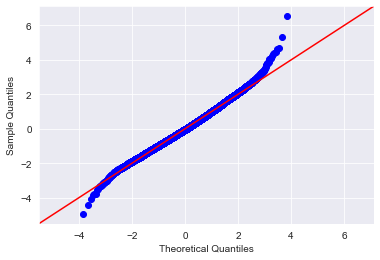

In [133]:
fig = sm.graphics.qqplot(model.resid, dist=scs.norm, line='45', fit=True)


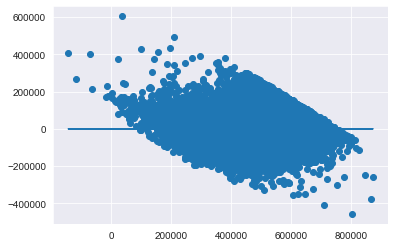

In [134]:
plt.scatter(model.predict(X), model.resid)
plt.plot(model.predict(X), [0 for i in range(len(df))])

0.8 percentile: 570000.0
0.81 percentile: 575000.0
0.82 percentile: 582595.9999999999
0.83 percentile: 590000.0
0.84 percentile: 599778.8800000001
0.85 percentile: 605000.0
0.86 percentile: 612500.0
0.87 percentile: 621500.0
0.88 percentile: 630000.0
0.89 percentile: 639954.62
0.9 percentile: 650000.0
0.91 percentile: 655066.0
0.92 percentile: 667000.0
0.93 percentile: 677000.0
0.94 percentile: 689631.9999999997
0.95 percentile: 700000.0
0.96 percentile: 710000.0
0.97 percentile: 722500.0
0.98 percentile: 734000.0
0.99 percentile: 749474.0


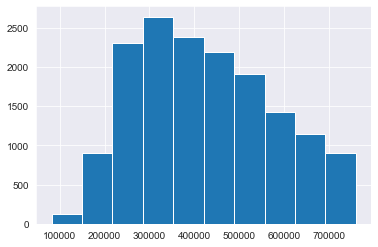

In [135]:
for i in range(80,100):
    q = i/100
    print("{} percentile: {}".format(q, df.price.quantile(q=q)))

df.price.hist()

In [136]:
df = df[df.price <= 725000.0]


In [137]:
X =df[x_cols]
y=df['price']
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.958
Model:                            OLS   Adj. R-squared (uncentered):              0.958
Method:                 Least Squares   F-statistic:                          4.453e+04
Date:                Thu, 04 Jun 2020   Prob (F-statistic):                        0.00
Time:                        14:21:24   Log-Likelihood:                     -1.9905e+05
No. Observations:               15517   AIC:                                  3.981e+05
Df Residuals:                   15509   BIC:                                  3.982e+05
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
bedrooms              -1.199e+04    932.750    -12.860      0.000   -1.38e+04   -1.02e+04
bathrooms              8825.5877   1231.514      7.166      0.000    6411.676    1.12e+04
sqft_living            5.605e+04   1282.912     43.691      0.000    5.35e+04    5.86e+04
sqft_lot                2.23e+04    966.016     23.083      0.000    2.04e+04    2.42e+04
distance_from_a_city  -8.672e+04    896.825    -96.691      0.000   -8.85e+04    -8.5e+04
Years_last_renovation  1.065e+04   1058.196     10.067      0.000    8578.169    1.27e+04
basement              -1.245e+04   1635.267     -7.615      0.000   -1.57e+04   -9247.137
grade                  5.817e+04    126.886    458.445      0.000    5.79e+04    5.84e+04
==============================================================================
Omnibus:                      208.658   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              256.994
Skew:                           0.213   Prob(JB):                     1.56e-56
Kurtosis:                       3.465   Cond. No.                         17.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [138]:
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

8 8
['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'distance_from_a_city']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
bedrooms,-1.199e+04,932.750,-12.860,0.0,-1.38e+04,-1.02e+04
bathrooms,8825.5877,1231.514,7.166,0.0,6411.676,1.12e+04
sqft_living,5.605e+04,1282.912,43.691,0.0,5.35e+04,5.86e+04
sqft_lot,2.23e+04,966.016,23.083,0.0,2.04e+04,2.42e+04
distance_from_a_city,-8.672e+04,896.825,-96.691,0.0,-8.85e+04,-8.5e+04


In [139]:
X = df[x_cols]
y= df['price']
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.958
Model:                            OLS   Adj. R-squared (uncentered):              0.958
Method:                 Least Squares   F-statistic:                          4.453e+04
Date:                Thu, 04 Jun 2020   Prob (F-statistic):                        0.00
Time:                        14:21:27   Log-Likelihood:                     -1.9905e+05
No. Observations:               15517   AIC:                                  3.981e+05
Df Residuals:                   15509   BIC:                                  3.982e+05
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
bedrooms              -1.199e+04    932.750    -12.860      0.000   -1.38e+04   -1.02e+04
bathrooms              8825.5877   1231.514      7.166      0.000    6411.676    1.12e+04
sqft_living            5.605e+04   1282.912     43.691      0.000    5.35e+04    5.86e+04
sqft_lot                2.23e+04    966.016     23.083      0.000    2.04e+04    2.42e+04
distance_from_a_city  -8.672e+04    896.825    -96.691      0.000   -8.85e+04    -8.5e+04
Years_last_renovation  1.065e+04   1058.196     10.067      0.000    8578.169    1.27e+04
basement              -1.245e+04   1635.267     -7.615      0.000   -1.57e+04   -9247.137
grade                  5.817e+04    126.886    458.445      0.000    5.79e+04    5.84e+04
==============================================================================
Omnibus:                      208.658   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              256.994
Skew:                           0.213   Prob(JB):                     1.56e-56
Kurtosis:                       3.465   Cond. No.                         17.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

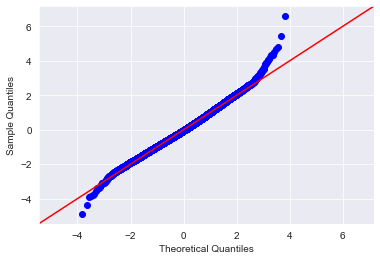

In [140]:
fig = sm.graphics.qqplot(model.resid, dist=scs.norm, line='45', fit=True)


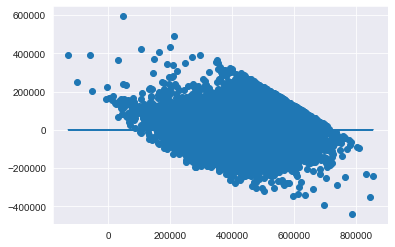

In [141]:
plt.scatter(model.predict(X), model.resid)
plt.plot(model.predict(X), [0 for i in range(len(df))])

In [142]:
def plot_residuals(resids):
    plt.hist(resids)
    plt.title("Residuals")
    plt.show()
    
    xspace = np.linspace(0, 1, len(resids))
    plt.scatter(xspace, resids)
    plt.title("resids")
    plt.hlines(0, xmin=0, xmax=1)
    plt.show()

In [143]:
residuals = model.resid

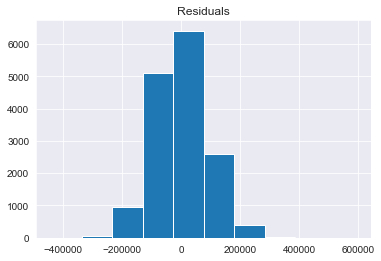

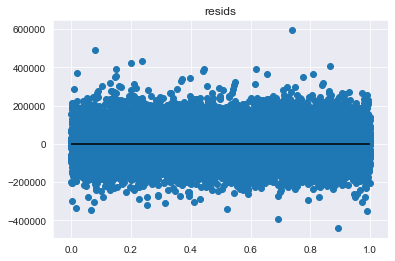

In [144]:
plot_residuals(residuals)

In [145]:
from sklearn.utils import shuffle
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE

from sklearn.metrics import r2_score

In [146]:
ols = LinearRegression(fit_intercept=False, normalize=False, n_jobs=-1)

In [147]:
cv5_scores = np.mean(cross_val_score(ols, X, y, scoring='r2', cv=5, n_jobs=-1) )
cv10_scores = np.mean(cross_val_score(ols, X, y, scoring='r2', cv=10, n_jobs=-1) )
cv20_scores = np.mean(cross_val_score(ols, X, y, scoring='r2', cv=20, n_jobs=-1) )

# cv breaks your data into that many equal pieces 
cv5_scores,cv10_scores,cv20_scores

(0.6074725914638851, 0.6055138237409842, 0.6053612090150637)

In [148]:
cv5mae_scores = np.mean(cross_val_score(ols, X, y, scoring='neg_mean_absolute_error', cv=5, n_jobs=-1) )
cv10mae_scores = np.mean(cross_val_score(ols, X, y, scoring='neg_mean_absolute_error', cv=10, n_jobs=-1) )
cv20mae_scores = np.mean(cross_val_score(ols, X, y, scoring='neg_mean_absolute_error', cv=20, n_jobs=-1) )

# cv breaks your data into that many equal pieces 
cv5mae_scores,cv10mae_scores,cv20mae_scores

(-71306.3042741306, -71299.0776217734, -71244.11545936056)

In [149]:
X_shuff, y_shuff = shuffle(X, y)
cv_scores = cross_val_score(ols, X_shuff, y_shuff, scoring='r2', cv=5, n_jobs=-1) 
cv_scores.mean()

0.6098931697296941

In [150]:
def make_ols_sklearn(X, y, test_size=0.20, fit_intercept=False, standardize=False):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    if standardize:
        ss = StandardScaler()
        ss.fit(X_train)
        X_train = ss.transform(X_train)
        X_test = ss.transform(X_test)
    ols = LinearRegression(fit_intercept=fit_intercept, normalize=False)
    ols.fit(X_train, y_train)
    train_score = ols.score(X_train, y_train)
    test_score = ols.score(X_test, y_test)
    cv5_scores = np.mean(cross_val_score(ols, X, y, scoring='r2', cv=5, n_jobs=-1) )
    cv10_scores = np.mean(cross_val_score(ols, X, y, scoring='r2', cv=10, n_jobs=-1) )
    cvmse_5 = np.mean(cross_val_score(ols,X , y, cv=5, scoring='neg_mean_squared_error'))
    cvmse_10 = np.mean(cross_val_score(ols,X, y, cv=10, scoring='neg_mean_squared_error'))
    print(f"train R2 score = {train_score}")
    print(f"test R2 score = {test_score}")
    print(f"cv5 R2 score = {cv5_scores}")
    print(f"cv10 R2 score = {cv10_scores}")
    print(f"cv5 MSE score = {cvmse_5}")
    print(f"cv10  MSE score = {cvmse_10}")

    return ols

In [151]:
make_ols_sklearn(X, y)

train R2 score = 0.6074100660744477
test R2 score = 0.6238431533784394
cv5 R2 score = 0.6074725914638851
cv10 R2 score = 0.6055138237409842
cv5 MSE score = -8161206396.693431
cv10  MSE score = -8158423693.04926


LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [152]:
make_ols_sklearn(X, y)

train R2 score = 0.6072641288930505
test R2 score = 0.6246416604390106
cv5 R2 score = 0.6074725914638851
cv10 R2 score = 0.6055138237409842
cv5 MSE score = -8161206396.693431
cv10  MSE score = -8158423693.04926


LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [203]:
residuals = model.resid

In [204]:
resid = pd.DataFrame(df['price'])

In [205]:
resid['residuals']  = residuals

In [206]:
resid

,price,residuals
0,538000.0,60998.983382
1,180000.0,-66218.515285
2,604000.0,167585.255715
3,510000.0,12119.171325
5,257500.0,-13842.889460
...,...,...
19216,475000.0,15447.892498
19217,360000.0,-69412.391388
19218,400000.0,-132355.529559
19219,402101.0,-61521.792447


In [207]:
import seaborn as sns

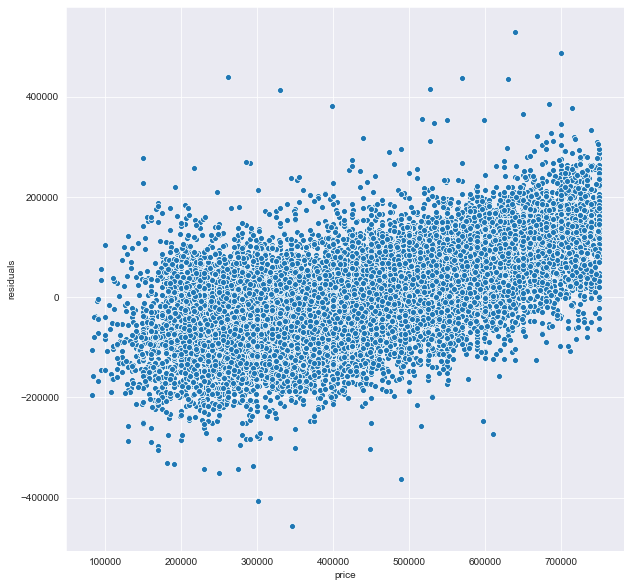

In [208]:
plt.figure(figsize= (10,10))

sns.scatterplot(y='residuals',x='price',data=resid)

In [209]:
X_shuff, y_shuff = shuffle(X, y)

In [212]:
X_shuff, y_shuff = shuffle(X, y)
cv_scores = cross_val_score(ols, X_shuff, y_shuff, scoring='r2', cv=5, n_jobs=-1) 
cv_scores.mean()

0.6190490159099289

In [213]:
X_shuff, y_shuff = shuffle(X, y)
cv_scores = cross_val_score(ols, X_shuff, y_shuff, scoring='r2', cv=5, n_jobs=-1) 
cv_scores.mean()

0.619577291871036

In [189]:
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.diagnostic import het_white